# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Oprah Winfrey
- Miley Cyrus
- Sam Smith
- J. Cole

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


# Dataset(s)

There are many datasets about movies that can be used to answer our question. We found a particular  dataset on kaggle that contains movie data through three decades (1986-2016), scraped from IMDB using Python.
Link to the dataset:
https://www.kaggle.com/danielgrijalvas/movies

This dataset contains 6820 observations and 15 columns. Each observation has the following attributes as appears in the website: 
- budget: the budget of a movie. Some movies don't have this, so it appears as 0
- company: the production company
- country: country of origin
- director: the director
- genre: main genre of the movie.
- gross: revenue of the movie
- name: name of the movie
- rating: rating of the movie (R, PG, etc.)
- released: release date (YYYY-MM-DD)
- runtime: duration of the movie
- score: IMDb user rating
- votes: number of user votes
- star: main actor/actress
- writer: writer of the movie
- year: year of release


# Setup

In [2]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

1) Loading the data


In [3]:
 df = pd.read_csv('movies.csv', encoding='latin1')
# Checking out the data
df.head(6)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986


2) Finding if there are rows with missing data

In [4]:
missingDataDf = df[df.isnull().any(axis=1)]
# Checking the size of the dataframe
missingDataDf.shape

(0, 15)

This shows that our dataset does not include rows with missing data

3) Our research hypothesis focuses only on movies produced in the United States, so we'll keep only the entries where the country field = USA

In [5]:
df = df[df['country'] == 'USA']
# checking the size of the dataset
df.shape

(4872, 15)

Our dataset now contains 4872 rows and 15 columns

4) looking at the min values in the budget and gross fields

In [6]:
df['budget'].min() 

0.0

In [7]:
df['gross'].min() 

309.0

5) Dealing with entries where the budget is zero

In [8]:
# finding how many rows with budget = 0
len(df[df['budget'] == 0])

1146

This shows that there are 1146 entries out of 4872 where the budget is zero. This is a large number so we'll test to see if there is a statistical significance between the gorssing of movies where the budget is specified and movies where the budget is zero before deciding if we are going to keep these entries or not. This will give us some sense whether the movies with zero budget are usually unimportant movies with low box office grossing.

In [9]:
# saving the gross data for all movies where the budget equals zero in a variable called dataZero
dataZero = df[df['budget'] == 0]['gross'].values
# saving the gross data for all movies where the budget does not equals zero in a variable called dataNonZero
dataNonZero = df[df['budget'] != 0]['gross'].values


# getting the mean of gross of each group
# YOUR CODE HERE
avg_Dzero = np.mean(dataZero)
avg_DnonZero= np.mean(dataNonZero)

t_val, p_val = stats.ttest_ind(avg_Dzero, avg_DnonZero)
# Check if statistical test passes significance, using an alpha value of 0.01.
if p_val < 0.01:
    print('there is a significant difference!')
else:
    print('There is NOT a significant difference!')
    
# note: source of code: assignment 4    


There is NOT a significant difference!


C:\Users\Tom\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Tom\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tom\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Tom\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Tom\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The result suggests that there is nothing special about  the gross income of entries in the dataset where the budget is zero  compared to entries where the budget is not zero. So, the last step in our data cleaning is to remove entries where the budget is equal to zero

In [10]:
df = df[df['budget'] > 0]

# checking the size of our dataset now
df.shape

(3726, 15)

6) Adding a field to our dataset that include the release month which will be extracted from the released field which has the format (YYYY-MM-DD)

In [11]:
df['released_month'] = df['released'].apply(lambda x: pd.to_datetime(x).month)

# Data Visualization

1) First, we're going to plot the distribution of the budget field

Text(0.5, 1.0, 'Budget Data')

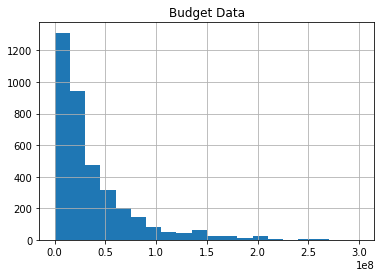

In [12]:
df.hist(column= 'budget', bins=20, )
plt.title('Budget Data')

The budget data is not normally distributed. We will perform a log transformation on the budget values and save the values in a new field called budget10

In [13]:
df['budget10'] = np.log10(df['budget'])

Now, we plot the budget10 data and compare it to a normal distribution

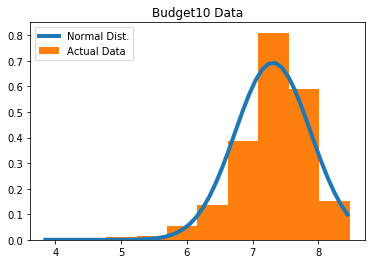

In [14]:
budget10Values = df['budget10'].values
xs = np.arange(budget10Values.min(), budget10Values.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(budget10Values), np.std(budget10Values))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(budget10Values, density=True, label='Actual Data');
plt.title('Budget10 Data')
plt.legend();

# code source: assignment 4

2) plotting distribution of the gross field

Text(0.5, 1.0, 'Gross Data')

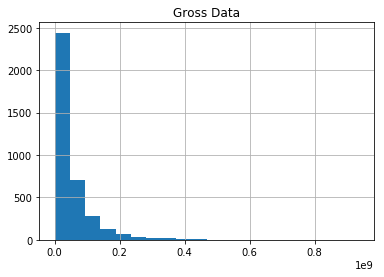

In [15]:
df.hist(column= 'gross', bins=20, )
plt.title('Gross Data')

The gross data is not normally distributed. We will perform a log transformation on the gross values and save the values in a new field called gross10

In [16]:
df['gross10'] = np.log10(df['gross'])

Now, we plot the gross10 data and compare it to a normal distribution

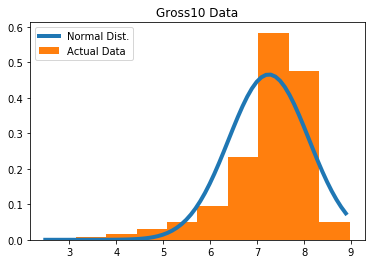

In [30]:

gross10Values = df['gross10'].values
xs = np.arange(gross10Values.min(), gross10Values.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(gross10Values), np.std(gross10Values))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(gross10Values, density=True, label='Actual Data');
plt.title('Gross10 Data')
plt.legend();

# code source: assignment 4

3) Finall, we'll make a scatter plot where the budget10 represent the x-axis and gross10 represent the y-axis

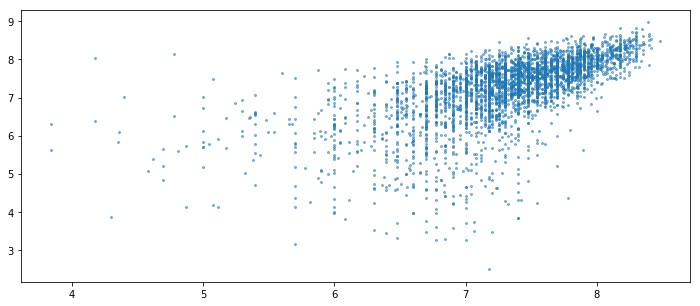

In [28]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)
plt.scatter(df['budget10'], df['gross10'], alpha=0.5, label='Data', s=4);


# Data Analysis & Results

1) From the scatter plot above, we can see that there are some movies that have high budget but low gross income, while other movies generated high income with low budget. To identify these, we're going to add another field to our dataset that contains the ratio of gross10 over budget10 and the look at entries that have a ratio value that's one standard deviation below the mean, and entries that have a ratio value that's one standard deviation above the mean

In [42]:
df['gross10/budget10'] = df['gross10'] / df['budget10']
meanMinusStd = df['gross10/budget10'].mean() - df['gross10/budget10'].std()
meanPlusStd = df['gross10/budget10'].mean() + df['gross10/budget10'].std()
lowGross10OverBudget10 = df[df['gross10/budget10'] < meanMinusStd]
highGross10OverBudget10 = df[df['gross10/budget10'] > meanPlusStd]

next, we'll find the ratio of movies with lowGross10OverBudget10 for each month and graph it

In [43]:
month_lowCounts = lowGross10OverBudget10['released_month'].value_counts()
month_lowRatio = []
for i in range(1, 13):
    ratio = (month_lowCounts.loc[i].item()) / len(df[df['released_month'] == i])
    month_lowRatio.append(ratio)

We'll combine the month_lowRatio array with an array that contains the months in a single dataframe, so we can plot it easily to make sense of the numbers

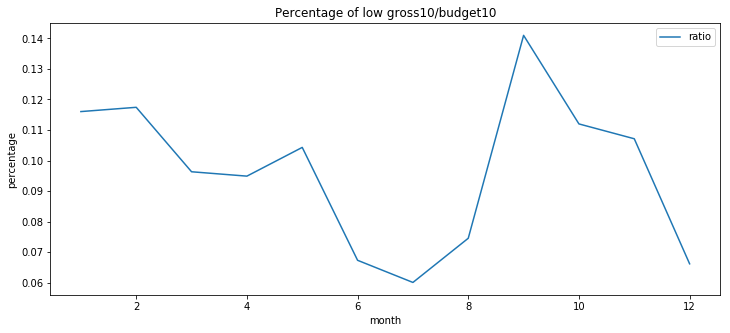

In [44]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
low_month_ratio_df = pd.DataFrame({'month':months,'ratio':month_lowRatio})

f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)

# generate a a legend
ax.plot(low_month_ratio_df['month'], low_month_ratio_df['ratio'])
ax.legend()

# add title and axis labels
ax.set_title('Percentage of low gross10/budget10')
ax.set_xlabel('month')
ax.set_ylabel('percentage');


The above graph suggests that the months of June, July, August and December have lower percentage of movies that have low gross over budget ratio. It also suggests that the month of Spetember has the highest

2) Next, we'll find the Percentage of movies with lowGross10OverBudget10 for each genre and graph it

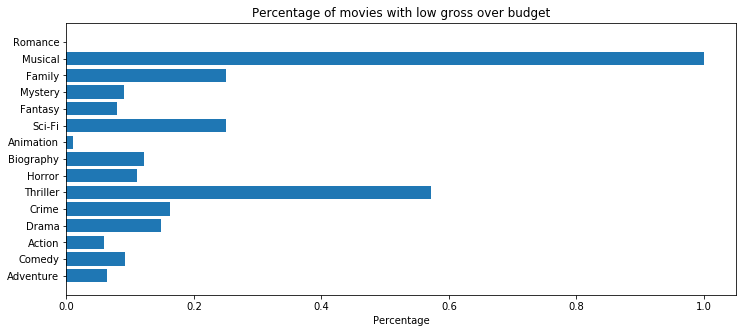

In [39]:
genreArr = df['genre'].unique()
month_lowRatio = []
genre_lowCounts = lowGross10OverBudget10['genre'].value_counts()
for i in genreArr:
    if i in genre_lowCounts:
        ratio = (genre_lowCounts.loc[i].item()) / len(df[df['genre'] == i])
        month_lowRatio.append(ratio)
    else:
        month_lowRatio.append(0)

low_genre_ratio_df = pd.DataFrame({"genre":genreArr, "ratio":month_lowRatio})

f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)
plt.barh(low_genre_ratio_df['genre'], low_genre_ratio_df['ratio'], align='center', alpha=1)
plt.xlabel('Percentage')
plt.title('Percentage of movies with low gross over budget')

plt.show()

The above graph suggests that the genres of Romance and animation have lower percentage of movies that have low gross over budget ratio. It also suggests that the genres of Musical and Thriller have the highest

3) Modeling the relationship between budget and gross income

In [40]:
outcome, predictors = patsy.dmatrices('gross10 ~ budget10', df)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                gross10   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     2303.
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:04:24   Log-Likelihood:                -3812.2
No. Observations:                3726   AIC:                             7628.
Df Residuals:                    3724   BIC:                             7641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5294      0.141      3.768      0.0

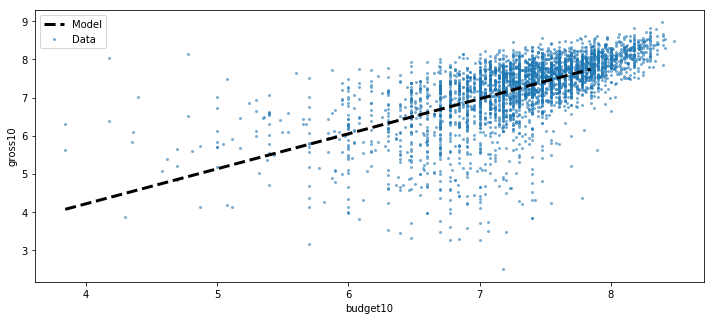

In [41]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)
# Plot the orginal data (as before)
plt.scatter(df['budget10'], df['gross10'], alpha=0.5, label='Data', s=4);

# Generate and plot the model fit line
xs = np.arange(df['budget10'].min(), df['budget10'].max())
ys =  0.9196  * xs + 0.5294
plt.plot(xs, ys, '--k', linewidth=3, label='Model')

plt.xlabel('budget10')
plt.ylabel('gross10')
plt.legend();

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*